<a href="https://colab.research.google.com/github/Tharunakula/Home-Assignment-3/blob/main/Q4%20Sentiment%20Classification%20Using%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 376s 955ms/step - accuracy: 0.6903 - loss: 0.5579 - val_accuracy: 0.8359 - val_loss: 0.3690
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 382s 955ms/step - accuracy: 0.8862 - loss: 0.2884 - val_accuracy: 0.8534 - val_loss: 0.3618
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 382s 954ms/step - accuracy: 0.9136 - loss: 0.2310 - val_accuracy: 0.8699 - val_loss: 0.3153
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step
Confusion Matrix:
 [[10493  2007]
 [ 1246 11254]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87     12500
           1       0.85      0.90      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



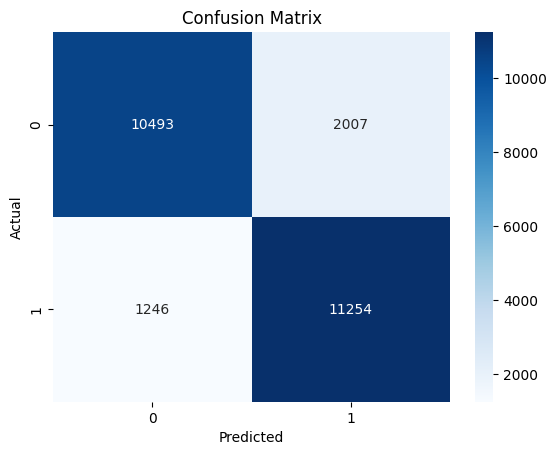

'\nThe precision-recall tradeoff is important in sentiment classification because it reflects the balance between correctly identifying positive sentiment (precision) and finding all positive sentiment instances (recall).\n\n* **Precision:** Measures how many of the reviews predicted as positive are actually positive. High precision means fewer false positives.\n* **Recall:** Measures how many of the actual positive reviews were correctly identified. High recall means fewer false negatives.\n\nIn sentiment analysis, the importance of precision and recall can vary depending on the application:\n\n* **Customer service:** High precision might be preferred to avoid falsely flagging negative reviews, which could lead to unnecessary intervention.\n* **Market research:** High recall might be preferred to capture as many negative reviews as possible, even if it means some false positives, to understand customer sentiment comprehensively.\n* **Risk management:** High recall is extremely importa

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000) # num_words limits vocab

# 2. Preprocess the text data
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# 3. Train an LSTM-based model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(10000, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# 4. Generate confusion matrix and classification report
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

#Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Precision-recall tradeoff
"""
The precision-recall tradeoff is important in sentiment classification because it reflects the balance between correctly identifying positive sentiment (precision) and finding all positive sentiment instances (recall).

* **Precision:** Measures how many of the reviews predicted as positive are actually positive. High precision means fewer false positives.
* **Recall:** Measures how many of the actual positive reviews were correctly identified. High recall means fewer false negatives.

In sentiment analysis, the importance of precision and recall can vary depending on the application:

* **Customer service:** High precision might be preferred to avoid falsely flagging negative reviews, which could lead to unnecessary intervention.
* **Market research:** High recall might be preferred to capture as many negative reviews as possible, even if it means some false positives, to understand customer sentiment comprehensively.
* **Risk management:** High recall is extremely important. If a company is looking for online threats, such as threats of violence, it is far more important to catch every single threat, even if it means that some false positives are flagged.
"""